### _Imports_

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model  import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import functions as fn # importing pre-defined functions from .py file (inside notebooks folder)

### Upload diamonds train data from csv

In [2]:
diamonds_train = pd.read_csv('../data/diamonds_train.csv')
diamonds_train.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


**Remark**: For the diamonds dataset, we have conducted an exploratory data analysis (EDA) in advance. Find references [here](https://github.com/Kristinawk/EDA_Diamonds).  
  
This dataset doesn't have nulls, therefore we can proceed directly with encoding.

## 1. Encoding

### Categorical variables overview

In [3]:
cat_var_lst = ["city", "cut", "color", "clarity"]
cat_var_overview = fn.cat_var(diamonds_train, cat_var_lst)
cat_var_overview

,categorical_variable,number_of_possible_values,values
0,city,13,"[Dubai, Kimberly, Las Vegas, Tel Aviv, Amsterd..."
1,clarity,8,"[VS2, VS1, SI1, SI2, IF, VVS1, VVS2, I1]"
2,color,7,"[J, H, G, D, F, E, I]"
3,cut,5,"[Premium, Very Good, Fair, Good, Ideal]"


### One hot encoding

In [4]:
baseline_train = fn.one_hot_encod(diamonds_train, cat_var_lst)

In [5]:
baseline_train.head()

,price,carat,depth,table,x,y,z,city_Antwerp,city_Dubai,city_Kimberly,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4268,1.21,62.4,58.0,6.83,6.79,4.25,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,505,0.32,63.0,57.0,4.35,4.38,2.75,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2686,0.71,65.5,55.0,5.62,5.53,3.65,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,738,0.41,63.8,56.0,4.68,4.72,3.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4882,1.02,60.5,59.0,6.55,6.51,3.95,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Checking that all features are numeric

In [6]:
baseline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               40455 non-null  int64  
 1   carat               40455 non-null  float64
 2   depth               40455 non-null  float64
 3   table               40455 non-null  float64
 4   x                   40455 non-null  float64
 5   y                   40455 non-null  float64
 6   z                   40455 non-null  float64
 7   city_Antwerp        40455 non-null  int64  
 8   city_Dubai          40455 non-null  int64  
 9   city_Kimberly       40455 non-null  int64  
 10  city_Las Vegas      40455 non-null  int64  
 11  city_London         40455 non-null  int64  
 12  city_Luxembourg     40455 non-null  int64  
 13  city_Madrid         40455 non-null  int64  
 14  city_New York City  40455 non-null  int64  
 15  city_Paris          40455 non-null  int64  
 16  city

## 2. Features selection and engineering

In this phase we will not apply any changes to the features.

### Save pre-processing to csv

In [7]:
baseline_train.to_csv('../data/baseline_train.csv', index=False)

## 3. Model training

In [8]:
y = baseline_train['price'].astype('float64').to_numpy()
X = baseline_train[[col for col in baseline_train.columns if col != 'price']].to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
#print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

## 3. a) LinearRegression

### Select Model

In [10]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

### Visual check

In [11]:
check = pd.DataFrame({'Ground truth': y_test, 'Predictions': y_pred, 'Diff': y_test - y_pred})
check

,Ground truth,Predictions,Diff
0,2970.0,3592.966083,-622.966083
1,3004.0,3180.816135,-176.816135
2,838.0,1303.984829,-465.984829
3,6468.0,6132.377051,335.622949
4,633.0,801.154705,-168.154705
...,...,...,...
8086,4764.0,5485.230912,-721.230912
8087,756.0,360.328256,395.671744
8088,2690.0,3346.974806,-656.974806
8089,3992.0,4535.724524,-543.724524


In [12]:
check.reset_index(inplace=True)

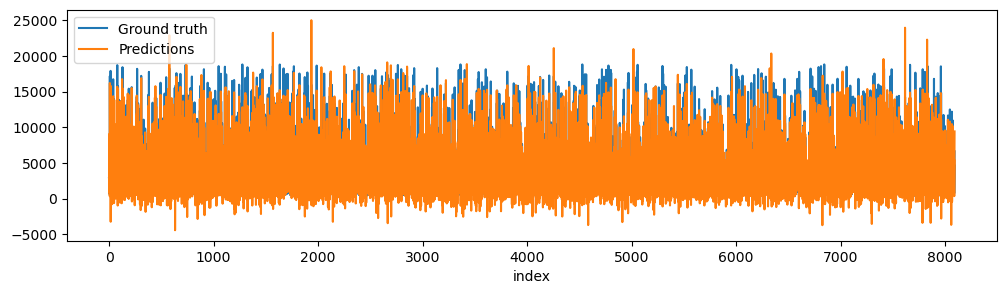

In [13]:
check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(12, 3));

### Error evaluation

In [14]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'rmse: {rmse}/n')
print(f'r2: {r2}')

rmse: 1124.8553834499114/n
r2: 0.9223017804520173


## 3. b) RandomForestRegressor

### Cross-validation

In [15]:
model_randomforest = RandomForestRegressor()

fn.cross_val(model_randomforest, X, y)

Cross val. scores: [-659.212525   -666.32947166 -675.83079119 -661.8760547  -655.66514653] 

Mean of scores: 663.7827978170295 



### Fit Model

In [16]:
model_randomforest.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

### Visual check

In [17]:
check = pd.DataFrame({'Ground truth': y_test, 'Predictions': y_pred, 'Diff': y_test - y_pred})
check

,Ground truth,Predictions,Diff
0,2970.0,3592.966083,-622.966083
1,3004.0,3180.816135,-176.816135
2,838.0,1303.984829,-465.984829
3,6468.0,6132.377051,335.622949
4,633.0,801.154705,-168.154705
...,...,...,...
8086,4764.0,5485.230912,-721.230912
8087,756.0,360.328256,395.671744
8088,2690.0,3346.974806,-656.974806
8089,3992.0,4535.724524,-543.724524


In [18]:
check.reset_index(inplace=True)

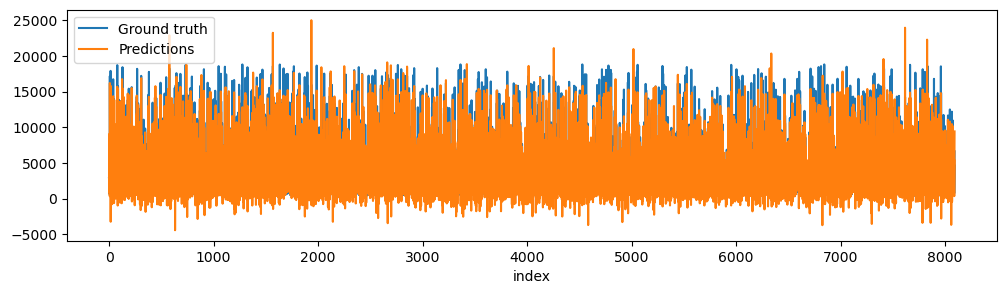

In [19]:
check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(12, 3));

# 4. Predictions

### Upload diamonds test data from csv

In [20]:
diamonds_test = pd.read_csv('../data/diamonds_test.csv')
diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam


### One-hot-encoding

In [21]:
baseline_test = fn.one_hot_encod(diamonds_test, cat_var_lst)

In [22]:
baseline_test = baseline_test.drop('id', axis=1)

In [23]:
baseline_test.head()

,carat,depth,table,x,y,z,city_Antwerp,city_Dubai,city_Kimberly,city_Las Vegas,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,5.82,5.89,3.67,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Predict: LinearRegression

In [24]:
linear_model_pred = model_linear.predict(baseline_test)

C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [25]:
linear_model_pred

array([ 3663.15318434,  6301.51625872, 10100.28314186, ...,
        3902.53069612,  1936.88218113,   713.46238336])

### Predict: RandomForestRegressor

In [26]:
randomforest_model_pred = model_randomforest.predict(baseline_test)

C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [27]:
randomforest_model_pred

array([2939.39, 5274.58, 9598.17, ..., 3023.58, 2185.71,  823.94])

### Save

In [28]:
#fn.save_pred(diamonds_test, linear_model_pred, 'pred_baseline')

In [29]:
fn.save_pred(diamonds_test, randomforest_model_pred, 'encod01_featu00_model00')

'file saved succesfully'